In [1]:
import h5py
import matplotlib.pyplot as plt
import numpy as np
import os
import pyfftw as ft
import time
import pyJHTDB
from pyJHTDB.dbinfo import isotropic1024coarse
from pyJHTDB import libJHTDB

In [2]:
N = 1024

In [3]:
u = ft.zeros_aligned((N,N,N), dtype='float32')
v = ft.zeros_aligned((N,N,N), dtype='float32')
w = ft.zeros_aligned((N,N,N), dtype='float32')

In [8]:
wiz = (b'(fftw-3.3.4 fftw_wisdom #x41ad5c95 #x159437f1 #x23fdee71 #xc6cf4464\n)\n',b'(fftw-3.3.4 fftwf_wisdom #xa84d9475 #xdb220970 #x4aa6f1c4 #xf3163254\n  (fftwf_dft_nop_register 0 #x10bdd #x10bdd #x0 #xd84e4956 #xbbda597c #x4dcc8ca2 #x8135f48a)\n  (fftwf_codelet_t1_16 0 #x10bdd #x10bdd #x0 #xbf8f2281 #x53d808d5 #x34ab52eb #x747f8bf4)\n  (fftwf_dft_r2hc_register 0 #x11bdd #x11bdd #x0 #x38a08196 #x2a4ca72e #x2d1ba440 #x10600d8c)\n  (fftwf_dft_vrank_geq1_register 0 #x10bdd #x10bdd #x0 #x89cb22ca #x6491b1a8 #xf5f7b0be #x3cd19d43)\n  (fftwf_rdft_rank0_register 3 #x10bdd #x10bdd #x0 #x91607aa1 #xd40dae11 #x01dbbb42 #x733d3911)\n  (fftwf_rdft2_rank_geq2_register 0 #x11bdd #x11bdd #x0 #xe0177557 #xe9f32997 #xfb2dcb2c #xf8f70860)\n  (fftwf_codelet_r2cb_128 0 #x10bdd #x10bdd #x0 #x673294cd #xe5b085a3 #xb8a774bf #xfd19dfb2)\n  (fftwf_rdft2_vrank_geq1_register 0 #x10bdd #x10bdd #x0 #x51dc8415 #xe75b399c #x04081a87 #xb9b03603)\n  (fftwf_dft_vrank_geq1_register 0 #x10fdd #x10fdd #x0 #x411f7a68 #x161cf1d6 #xbec2d98e #x7d9fdffa)\n  (fftwf_dft_r2hc_register 0 #x10bdd #x10bdd #x0 #x3c666628 #x01043fe7 #x20ba9e85 #x1f9b67a1)\n  (fftwf_rdft2_buffered_register 1 #x11bdd #x11bdd #x0 #x69793f35 #x0f5aa95f #xa83132f0 #x328dd9f1)\n  (fftwf_codelet_hc2cfdft_16 0 #x11bdd #x11bdd #x0 #xd1b98a4a #x0805ac14 #xb1e32112 #x8a8a92ee)\n  (fftwf_rdft2_buffered_register 0 #x11bdd #x11bdd #x0 #x1a3fc773 #x16826a6d #x4ac1ba9b #x71705541)\n  (fftwf_dft_nop_register 0 #x11bdd #x11bdd #x0 #xb5f6482a #x970cff75 #xad1e3938 #x526a74d7)\n  (fftwf_dft_nop_register 0 #x11bdd #x11bdd #x0 #x2ca97a7c #x1278c07a #x4b274fea #x63afcfcd)\n  (fftwf_dft_r2hc_register 0 #x11bdd #x11bdd #x0 #x8499a39f #xaa8551b1 #xea2f560f #xd368cb36)\n  (fftwf_rdft2_thr_vrank_geq1_register 0 #x11bdd #x11bdd #x0 #xecb29e47 #x03b3cd61 #xa27bbdd7 #xf1a239db)\n  (fftwf_codelet_t1_4 0 #x10fdd #x10fdd #x0 #x914f085b #x7945eab1 #xb24b3509 #x41ff886a)\n  (fftwf_dft_r2hc_register 0 #x10bdd #x10bdd #x0 #x37c7ab24 #x6b6a7433 #xbb43af76 #x9bd7720f)\n  (fftwf_rdft_rank0_register 2 #x10bdd #x10bdd #x0 #x104e8159 #x92ac0177 #x0f50339e #x2c4a57af)\n  (fftwf_rdft2_thr_vrank_geq1_register 0 #x11bdd #x11bdd #x0 #xbb77bc38 #x24b662bb #xf4685bca #xf2ee6fb2)\n  (fftwf_dft_vrank_geq1_register 0 #x11bdd #x11bdd #x0 #x1fe15182 #x5f3d421c #xba834eb6 #x2292df94)\n  (fftwf_codelet_r2cb_32 0 #x10bdd #x10bdd #x0 #xe04e14d1 #xc3b82d93 #xa2db087a #x2b77f40f)\n  (fftwf_rdft2_vrank_geq1_register 0 #x10bdd #x10bdd #x0 #x7411e346 #xe554a2d2 #xe65b560d #xb419b90b)\n  (fftwf_rdft2_thr_vrank_geq1_register 0 #x11bdd #x11bdd #x0 #x4febdca9 #xa9f8d1e2 #x4784fdd8 #xe8372b48)\n  (fftwf_dft_buffered_register 1 #x11bdd #x11bdd #x0 #xb6380734 #x8d827d8e #xdc067a28 #x4fc763de)\n  (fftwf_dft_buffered_register 0 #x10bdd #x10bdd #x0 #x3eeb1978 #x428183dc #x2a84fbfa #xe4361ea0)\n  (fftwf_dft_indirect_register 0 #x10bdd #x10bdd #x0 #x9c0e3f58 #x928ea026 #xd28229a3 #x7246e0ac)\n  (fftwf_rdft2_vrank_geq1_register 0 #x11bdd #x11bdd #x0 #x9740c915 #x6dd03089 #x48a698f2 #x894d5d03)\n  (fftwf_codelet_r2cbIII_8 2 #x10bdd #x10bdd #x0 #xfb67696a #x19d836b7 #x6b24c329 #xe4fc2e8b)\n  (fftwf_dft_vrank_geq1_register 0 #x10fdd #x10fdd #x0 #x68ff47a8 #x21bb9e5b #xa20dc9bd #xd2485c0c)\n  (fftwf_codelet_q1_4 0 #x10fdd #x10fdd #x0 #xee87b2d5 #x3e497607 #xfff1907f #xf9579a39)\n  (fftwf_rdft_rank0_register 1 #x11bdd #x11bdd #x0 #x9dc32488 #xbecf3be7 #xa959c90a #x27692f2f)\n  (fftwf_codelet_n1_64 0 #x10fdd #x10fdd #x0 #xee00c037 #x8d699089 #xad7ad6a0 #x4efaaf7d)\n  (fftwf_rdft2_rank_geq2_register 0 #x11bdd #x11bdd #x0 #xbd6b8262 #xabd0b6b7 #xe6ad6d03 #x628df7dc)\n  (fftwf_dft_vrank_geq1_register 0 #x10fdd #x10fdd #x0 #x8676a7b7 #xe006c70d #x487b0278 #xb2f8f002)\n  (fftwf_dft_thr_vrank_geq1_register 0 #x11bdd #x11bdd #x0 #xce1da3b2 #xb156b9ff #x345deb46 #x24967a68)\n  (fftwf_dft_r2hc_register 0 #x11bdd #x11bdd #x0 #x129e3b9a #xbe5c8c09 #x84314e36 #x92c09d6d)\n  (fftwf_codelet_r2cf_16 2 #x11bdd #x11bdd #x0 #x2c17488d #x9de9ae61 #x64b4dbe3 #xe8dea2da)\n  (fftwf_rdft2_vrank_geq1_register 0 #x11bdd #x11bdd #x0 #x32025de0 #x37ce7b0a #x95c084dd #xcd18ab21)\n  (fftwf_codelet_t1_16 0 #x10bdd #x10bdd #x0 #xcd08c9cd #xac2dabe6 #x0a6d47c5 #x5b07814f)\n  (fftwf_rdft_rank0_register 3 #x11bdd #x11bdd #x0 #x91607aa1 #xd40dae11 #x01dbbb42 #x733d3911)\n  (fftwf_codelet_hc2cb_8 0 #x10bdd #x10bdd #x0 #x48259488 #x196c8c29 #x37f91b06 #x556264da)\n  (fftwf_rdft2_nop_register 0 #x11bdd #x11bdd #x0 #x4779d627 #xb75d986f #x6f0fd6a5 #x2919c9b3)\n  (fftwf_rdft_rank0_register 2 #x11bdd #x11bdd #x0 #x499fe701 #xb6acaa67 #x2db9b042 #x888a5db8)\n  (fftwf_dft_vrank_geq1_register 0 #x11bdd #x11bdd #x0 #xca4b9bb9 #x447b7ee5 #xbb98516b #x49ee082c)\n  (fftwf_codelet_n1_64 0 #x10fdd #x10fdd #x0 #x2d58151a #x7bf279ac #xd05075c9 #x05025c02)\n  (fftwf_codelet_r2cb_32 2 #x10bdd #x10bdd #x0 #x481c15e4 #x35bbbfd8 #x23c8512b #x81cdaf85)\n  (fftwf_codelet_hc2cb_32 0 #x10bdd #x10bdd #x0 #x7c30b5d7 #x8b441fd5 #xfb999103 #x8fe179d7)\n  (fftwf_codelet_r2cfII_8 2 #x11bdd #x11bdd #x0 #xc7a8d0be #x7798b669 #x9437b479 #x2ba791fc)\n  (fftwf_rdft_rank0_register 4 #x10bdd #x10bdd #x0 #xf3c0402e #xf303d9aa #xbdc22798 #xd9510af9)\n  (fftwf_codelet_r2cf_128 0 #x11bdd #x11bdd #x0 #x23eb177d #x111d2c06 #xa78f35fb #xd56dcd76)\n  (fftwf_codelet_t1_4 0 #x10fdd #x10fdd #x0 #x1e5fa302 #x4dca4b4b #x68854fe7 #x57f745da)\n  (fftwf_dft_vrank_geq1_register 0 #x10bdd #x10bdd #x0 #xf6843763 #xe67a42c5 #x37896514 #x1934a686)\n  (fftwf_dft_buffered_register 1 #x10bdd #x10bdd #x0 #x7cf6cc98 #x1860681d #x04f92f92 #x64e3787b)\n  (fftwf_rdft2_thr_vrank_geq1_register 0 #x11bdd #x11bdd #x0 #x245908be #x1b45c309 #xfa989829 #xe3448ecb)\n  (fftwf_rdft_vrank_geq1_register 0 #x11bdd #x11bdd #x0 #x2fdf6c57 #xa3a423cb #x3c83b16e #xd62995da)\n  (fftwf_rdft2_thr_vrank_geq1_register 0 #x10bdd #x10bdd #x0 #x0478d9e6 #xffc458b2 #xefeba0c5 #xe8fb2e05)\n  (fftwf_codelet_n1_64 0 #x10bdd #x10bdd #x0 #x1913d4ac #xf2d50866 #xc504d3dd #x76d5edcd)\n  (fftwf_rdft2_thr_vrank_geq1_register 0 #x11bdd #x11bdd #x0 #xca971946 #x2f6dbe24 #x85529bf6 #x283c73d7)\n  (fftwf_dft_r2hc_register 0 #x11bdd #x11bdd #x0 #xdabdf95d #x7d3ac753 #x24c8f7fe #x2690c32c)\n  (fftwf_rdft2_vrank_geq1_register 0 #x10bdd #x10bdd #x0 #x1a3fc773 #x16826a6d #x4ac1ba9b #x71705541)\n  (fftwf_dft_vrank_geq1_register 0 #x10fdd #x10fdd #x0 #x09558463 #xdea41841 #xf014e84a #x343a12e5)\n  (fftwf_rdft_vrank_geq1_register 0 #x10bdd #x10bdd #x0 #x2b2a182d #x1a4f0eb8 #x4051bfc8 #x50ede16d)\n  (fftwf_codelet_r2cb_8 2 #x10bdd #x10bdd #x0 #x669a3813 #x9ba2bb21 #x64e8656d #x87c9de00)\n  (fftwf_rdft_rank0_register 2 #x11bdd #x11bdd #x0 #x104e8159 #x92ac0177 #x0f50339e #x2c4a57af)\n  (fftwf_dft_buffered_register 0 #x11bdd #x11bdd #x0 #xf6040783 #x4ecac406 #x61d1e470 #xc372144f)\n  (fftwf_dft_r2hc_register 0 #x10bdd #x10bdd #x0 #x33c540f7 #x7207139c #x75ca3a4c #x748bc1b6)\n  (fftwf_dft_nop_register 0 #x10bdd #x10bdd #x0 #x4c6eda6a #xd64bb98a #xdeff4d47 #xbd9bc277)\n  (fftwf_dft_r2hc_register 0 #x10bdd #x10bdd #x0 #x54bf9035 #xa469d859 #x8c3af79c #xaabf7edf)\n  (fftwf_codelet_r2cbIII_32 2 #x10bdd #x10bdd #x0 #x950ba594 #x798cabb6 #x528ada2d #x11b725d6)\n  (fftwf_rdft_vrank_geq1_register 0 #x10bdd #x10bdd #x0 #x3c3caadf #x2c0d7839 #xd5ec6491 #x039fd16e)\n  (fftwf_codelet_q1_4 0 #x10fdd #x10fdd #x0 #x6e3f6b00 #xc631065b #xc5ce0991 #xc9e5830a)\n  (fftwf_codelet_n1_64 0 #x11bdd #x11bdd #x0 #x6ba9d10c #xfa10a643 #x2012f96a #x39264f53)\n  (fftwf_codelet_hc2cf_8 0 #x11bdd #x11bdd #x0 #xa3aa3245 #xfa89ad84 #x6f51d136 #x21269ea8)\n  (fftwf_codelet_r2cf_8 2 #x11bdd #x11bdd #x0 #x675249aa #x037557b8 #x14643a4b #x9ea626ef)\n  (fftwf_rdft2_nop_register 0 #x11bdd #x11bdd #x0 #x3192bc8d #x1ee9ee00 #x8730d991 #x0cca9385)\n  (fftwf_dft_indirect_register 0 #x10bdd #x10bdd #x0 #x938d7e18 #x1343c0de #xbe03a120 #x64e734a9)\n  (fftwf_rdft2_rank_geq2_register 0 #x10bdd #x10bdd #x0 #xb27d35ea #xa96ba975 #x4796bd74 #xae50e653)\n  (fftwf_codelet_r2cfII_16 2 #x11bdd #x11bdd #x0 #x2132a5dc #x311011eb #x17bd5a12 #x5b4ef596)\n  (fftwf_dft_thr_vrank_geq1_register 0 #x10bdd #x10bdd #x0 #x519e2811 #xfd996521 #x222afcf1 #xa289f0a6)\n  (fftwf_codelet_n1_64 0 #x10bdd #x10bdd #x0 #xbf36f96d #xc5099024 #xab4588dd #x0f71c101)\n  (fftwf_rdft2_rank_geq2_register 0 #x10bdd #x10bdd #x0 #xb8bedcad #x45a4525b #xc44e4385 #xa637a3a4)\n)\n',b'(fftw-3.3.4 fftwl_wisdom #x0821b5c7 #xa4c07d5a #x21b58211 #xebe513ab\n)\n')
ft.import_wisdom(wiz)

(True, True, True)

In [9]:
start = time.time()

fo = ft.zeros_aligned((N,N,N), dtype='float32')
bo = ft.zeros_aligned((N//2+1,N,N), dtype='complex64')
fft_object = ft.FFTW(fo,bo,axes=(0,), direction='FFTW_FORWARD', flags=('FFTW_MEASURE', ),threads=8)
ifft_object = ft.FFTW(bo,fo,axes=(0,), direction='FFTW_BACKWARD', flags=('FFTW_MEASURE', ),threads=8)

end = time.time()
print(end-start)

12.997854709625244


In [10]:
ft.export_wisdom()

(b'(fftw-3.3.4 fftw_wisdom #x41ad5c95 #x159437f1 #x23fdee71 #xc6cf4464\n)\n',
 b'(fftw-3.3.4 fftwf_wisdom #xa84d9475 #xdb220970 #x4aa6f1c4 #xf3163254\n  (fftwf_dft_nop_register 0 #x10bdd #x10bdd #x0 #xd84e4956 #xbbda597c #x4dcc8ca2 #x8135f48a)\n  (fftwf_codelet_t1_16 0 #x10bdd #x10bdd #x0 #xbf8f2281 #x53d808d5 #x34ab52eb #x747f8bf4)\n  (fftwf_dft_r2hc_register 0 #x11bdd #x11bdd #x0 #x38a08196 #x2a4ca72e #x2d1ba440 #x10600d8c)\n  (fftwf_dft_vrank_geq1_register 0 #x10bdd #x10bdd #x0 #x89cb22ca #x6491b1a8 #xf5f7b0be #x3cd19d43)\n  (fftwf_rdft_rank0_register 3 #x10bdd #x10bdd #x0 #x91607aa1 #xd40dae11 #x01dbbb42 #x733d3911)\n  (fftwf_rdft2_rank_geq2_register 0 #x11bdd #x11bdd #x0 #xe0177557 #xe9f32997 #xfb2dcb2c #xf8f70860)\n  (fftwf_codelet_r2cb_128 0 #x10bdd #x10bdd #x0 #x673294cd #xe5b085a3 #xb8a774bf #xfd19dfb2)\n  (fftwf_rdft2_vrank_geq1_register 0 #x10bdd #x10bdd #x0 #x51dc8415 #xe75b399c #x04081a87 #xb9b03603)\n  (fftwf_dft_vrank_geq1_register 0 #x10fdd #x10fdd #x0 #x411f7a68 #x161c

In [11]:
start = time.time()

folder = '/home/idies/workspace/scratch'

nproc = 8
nx = N//nproc

vx = ft.zeros_aligned((N//nproc,N,N), dtype='float32')
vy = ft.zeros_aligned((N//nproc,N,N), dtype='float32')
vz = ft.zeros_aligned((N//nproc,N,N), dtype='float32')

folder = '/home/idies/workspace/scratch'

for k in range(nproc):
    filename = 'ref-isotropic1024coarse-'+str(k)+'-(t=0.0).npz'
    file = folder+'/'+filename
    
    content = np.load(file)
    if(int(content['nproc'])!=nproc):
        print("Unmatched number of processes. Must first pre-process to adequate number of process")
    
    vx[:,:,:] = content['vx']
    vy[:,:,:] = content['vy']
    vz[:,:,:] = content['vz']
    
    u[k*nx:(k+1)*nx,:,:] = vx[:,:,:]
    v[k*nx:(k+1)*nx,:,:] = vy[:,:,:]
    w[k*nx:(k+1)*nx,:,:] = vz[:,:,:]

end = time.time()
print(end-start)

93.23890137672424


In [12]:
del vx,vy,vz

In [13]:
u2 = u**2

In [16]:
cu = ft.zeros_aligned((N//2+1,N,N), dtype='complex64')
cu2 = ft.zeros_aligned((N//2+1,N,N), dtype='complex64')

In [17]:
start = time.time()

fo[:,:,:] = u[:,:,:]
fft_object.update_arrays(fo,bo)
fft_object.execute()
cu[:,:,:] = bo[:,:,:]

fo[:,:,:] = u2[:,:,:]
fft_object.update_arrays(fo,bo)
fft_object.execute()
cu2[:,:,:] = bo[:,:,:]

end = time.time()
print(end-start)

117.19529151916504


In [18]:
start = time.time()

wcorr = ft.zeros_aligned((N,N,N),dtype='float32')

end = time.time()
print(end-start)

6.246571779251099


In [50]:
start = time.time()

tmp = 3*cu2*(cu.conj()) + 3*cu*(cu2.conj())
bo[:,:,:] = tmp[:,:,:]
ifft_object.update_arrays(bo,fo)
ifft_object.execute()
wcorr[:,:,:] = fo[:,:,:]/(N**3)

end = time.time()
print(end-start)

108.7859194278717


In [46]:
F3 = np.average(wcorr,axis=(1,2))

In [47]:
print(F3.shape)

(1024,)


In [48]:
rbins = np.linspace(0,2*np.pi,F3.shape[0])

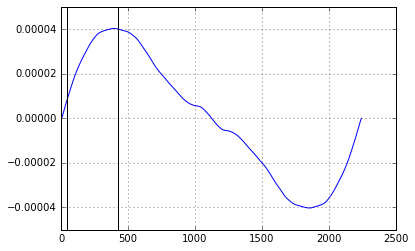

In [49]:
eta = 0.00280
plt.plot(rbins/eta,F3)
plt.grid()
#plt.plot(rbins/eta,0.8*0.103*(rbins/eta))
plt.axvline(x=42.5,color='k')
plt.axvline(x=425 ,color='k')